In [1]:
%load_ext lab_black

**Introduction**

Quickfile is an online tax preparation platform catering to both businesses and individuals (B2B and B2C). We'll specifically focus on Tax Professionals (B2B segment) who use Quickfile to manage their clients' taxes.

**Understanding the Tax Cycle**

Businesses typically operate in fiscal cycles to track performance. Similarly, the tax world has its unique cycle, with the tax year concluding on April 30th and restarting on May 1st. In this workshop, we'll analyze churn within this context.

**Data Source**

While we'd usually pull data directly from a database, we've provided convenient CSV files for accessibility purposes. This allows you to focus on the analysis without database connection setup.

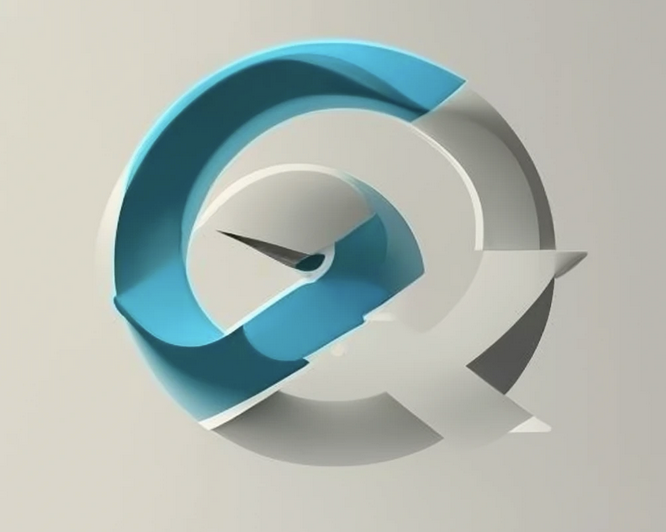

First, we'll load the pandas and numpy libraries.

 - pandas (pd): This library is a fundamental tool for data analysis in Python. It provides powerful data structures like DataFrames (similar to spreadsheets) and Series (one-dimensional labeled arrays) for working with tabular data efficiently. We'll use pandas throughout this workshop to load, manipulate, and analyze our dataset.<br>
 - numpy (np): NumPy is the foundation for numerical computing in Python. It offers high-performance arrays and mathematical functions that are crucial for data manipulation and calculations. While pandas leverages NumPy under the hood, we might occasionally use NumPy's functionalities directly for specific operations.<br>

**The Benefits of Aliasing (pd and np):**<br>
Readability: Typing pd and np is more concise than the full library names, especially when used frequently throughout the code. This improves code readability and reduces visual clutter.

In [2]:
# Load the pandas and numpy packages

# ... YOUR CODE ...

## 2. Identify Tax Year Activity

Our analysis focuses on customer activity within the tax years 2021 and 2022.<br>

Here's how we'll determine a Pro customer's active tax year based on their purchase date:<br>

 - Active in Tax Year 2021: A Pro customer is considered active in tax year 2021 if they purchased our tax filing product between May 1st, 2021 and April 30th, 2022. This timeframe aligns with the standard tax filing period for that year.
 - Active in Tax Year 2022: Similarly, a Pro customer is considered active in tax year 2022 if their purchase falls between May 1st, 2022 and April 30th, 2023.

Since the raw data might not explicitly indicate the tax year of activity, we need to apply conditional logic to categorize each customer purchase based on the purchase date. This categorization is crucial for analyzing customer retention and understanding how well we're retaining customers across different tax years.

In [3]:
# Pull relevant data from our CUSTOMER SALES DATE table (Load the data)
sales_date_df = pd.read_csv("CustomerSalesDate.csv")
# Display the first few rows using the head method
sales_date_df.head()

,accountID,salesDate
0,44451402,2022-04-17 16:47:17
1,30492817,2022-04-06 05:50:41
2,16691344,2022-04-01 07:07:08
3,19433773,2022-04-06 03:35:31
4,25169734,2022-04-07 22:52:07


In [4]:
# Check data types! Has the SalesDate column been read in as a date? To check, display the salesDate column
print(...)
# convert to a datetime
sales_date_df["salesDate"] = ...

0       2022-04-17 16:47:17
1       2022-04-06 05:50:41
2       2022-04-01 07:07:08
3       2022-04-06 03:35:31
4       2022-04-07 22:52:07
               ...         
9168    2022-06-18 12:31:04
9169    2021-07-01 17:46:43
9170    2022-08-23 03:55:26
9171    2022-08-23 19:11:29
9172    2021-07-02 19:23:14
Name: salesDate, Length: 9173, dtype: object


In [5]:
def get_tax_year(row):
    """
    Assigns a tax year (TY) to a customer based on their purchase date.
    Args:
    row: A row from a pandas DataFrame containing a 'date' column.
    Returns:
    A string representing the tax year (e.g., 'TY20', 'TY21', 'TY22').
    """
    # Define start and end dates for each tax year
    ty21_start = pd.to_datetime('YYYY-MM-DD')
    ty21_end = pd.to_datetime('YYYY-MM-DD')
    ty22_start = pd.to_datetime('YYYY-MM-DD')
    ty22_end = pd.to_datetime('YYYY-MM-DD')

    # Conditional logic to assign tax year
    if ...:
        return "TY21"
    elif ...:
        return "TY22"
    else:
        return "NA"  # Or any other value for non-qualifying dates

In [6]:
# APPLY the get_tax_year function to the 'salesDate' column
transactionTaxYear = ...

In [7]:
# Concatenate the 'transactionTaxYear' pandas Series with the 'accountID' pandas Series
transaction_tax_year_df = pd.concat(
    [..., ...], axis=1 # the axis argument determins along which axis, rows (0) or columns(1), the concat operation is performed.
)

## 3. Identify Churned Customers

Now that we can pinpoint the tax year of a customer's purchase, let's tackle the key question: has this customer churned?

A customer is considered churned if they were active in a specific tax year (e.g., TY21) but not active in the subsequent year (TY22). This means they made a purchase in one year but didn't return for the next tax year.

Example:

 - A customer who purchased in May 2021 (TY21) but has no purchases between May 2022 and April 2023 (TY22) would be classified as churned.

Understanding Churn Analysis:

By identifying churned customers, we can gain valuable insights into user retention. This analysis helps us understand why customers might be leaving and allows us to develop strategies to improve customer loyalty and reduce churn rates.

In [8]:
# Group the DataFrame by accountID and aggregate by list
grouped_df = ...
# Display the grouped dataframe
grouped_df

,salesDate
accountID,
19524,"[TY21, TY22]"
22182,[TY21]
22210,"[TY21, TY22]"
24657,"[TY22, TY21]"
25127,"[TY22, TY21]"
...,...
99851556,"[TY21, TY22]"
99961922,"[TY22, TY21]"
99976143,[TY21]


In [9]:
# APPLY a lambda function to the transactionTaxYear column:
## IF a list is greater than 1 (customer has multiple years of sales), label as 'non_churned'
## ELSE label 'churned'
labels = grouped_df["salesDate"].apply(
    lambda x: ... if len(x) ... else ...
)
# Convert the labels pandas Series to a DataFrame (we can actually do this by reseting the index)
labels_df = 

## 3) Extract the Month of Sale
Interestingly, the month that a Pro customer signs up (purchases our product) might be indicative of their success, which in turn, may be linked to their likelihood of churning.

Focusing on the First Purchase

As we investigate the potential link between signup month and customer success/churn, it's crucial to focus on the first purchase date for each customer. This is because subsequent purchases might not necessarily reflect their initial experience or decision-making process.

Extracting the Month (min vs. max)

To analyze purchase patterns across months, we need to extract the month from the initial purchase date for each customer. Here, we'll use a **min** operation (as opposed to max) on the *salesDate* column. This ensures we capture the earliest purchase date for each customer.

In [10]:
# Group the DataFrame by accountID and aggregate by the MINimum salesDate
min_sale_df = sales_date_df ...
# extract the month from the min_sale_df salesDate column
initialSaleMonth = min_sale_df["salesDate"] ...

In [11]:
# We some some renaming here to make things more readable. Remember, more readable code is likely to have fewer errors!
account_sales_history_df = labels_df.rename(columns={"salesDate": "label"}).merge(
    initialSaleMonth.reset_index().rename(columns={"salesDate": "saleMonth"}),
    on="accountID",
)

## 4) Merge

Our sales data currently identifies customers by their accountID. However, additional customer attributes reside in a separate table linked by a different identifier (CompanyID).

To gain a more holistic view of our customers, we'll perform a merge operation. This will combine the sales history data (with accountID as the key) with the company information table (using CompanyID as the key). This process will enrich our sales data by associating each sale with the corresponding customer's company details.
<br>
1) Pull data fom our AccountID_CompanyID table.
<br>
2) Merge a customer's sales history with the customer's CompanyID.

In [12]:
# Pull data from our AccountID_CompanyID Table
account_company_ID_link_df = pd.read_csv("Account_Company_ID_Linking_Table.csv")
# Merge a customer's Sales History with the customer's CompanyID
customer_sales_history_df = account_company_ID_link_df.merge(
    account_sales_history_df, on="accountID"
)

## 5) Merge Again:)

Building the Customer Profile

Since we've successfully merged the sales data with the CompanyID, we now have a crucial identifier to link with other datasets potentially containing additional customer information.
<br>
Merge a customer's sales history with the customer's CompanyID.

In [30]:
# Pull data from our Company Data Table
company_data = pd.read_csv("CompanyID_Data.csv")
# Merge
company_data_df = customer_sales_history_df.merge(
    company_data, on="companyID"
).drop_duplicates(subset=["accountID"]) # specifying a subset instructs the function to consider only the accountID column for duplicate detection. 

## 6) Binarize
Encoding Categorical Product Types for Machine Learning

In our current DataFrame, the productType column contains textual data that describes the products a customer has purchased. However, it's often more difficult for machine learning algorithms to directly process strings. To enable effective machine learning analysis, we'll convert this categorical data into a numerical representation.

Introducing MultiLabelBinarizer: A Powerful Tool for One-Hot Encoding

We'll apply the MultiLabelBinarizer object from scikit-learn, a versatile tool for encoding multi-label categorical features. Unlike single-label categorical data (where a customer purchases only one product), multi-label data allows customers to purchase multiple products. The MultiLabelBinarizer addresses this by creating a one-hot encoded representation for each unique product category.

One-Hot Encoding Explained

One-hot encoding is a technique that transforms each unique category (e.g., "Product A", "Product B") into a separate binary column. In this binary column, a value of 1 indicates a purchase of that product, while 0 signifies no purchase. This approach provides a more machine learning-friendly format that facilitates algorithms in understanding patterns and relationships within the data.<br>

The documentation for the MultiLabelBinarizer object is linked here:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html 

In [32]:
product_type = company_data_df["productType"].apply(lambda x: x.split(","))

In [33]:
# Import the MultiLabelBinarizer object from the sklean.preprocessing library
from sklearn.preprocessing import MultiLabelBinarizer
# Create a MultiLabelBinarizer object
mlb = MultiLabelBinarizer()
# Apply the fit_transform method to the product_type pandas Series
numpy_array = mlb ...
# Transform the numpy_array variable to a DataFrame
product_type_dataframe = pd.DataFrame(...)
# Convert the mlb.classes_ object to a list
cols = list(...)
# Assign the cols to the dataframe columns
product_type_dataframe.columns = ...

## 7) Bin
Unlocking Patterns with Binning: The Case of Customer Spend

Tree-based machine learning algorithms often excel at identifying patterns in categorical data. But what if our data, like customer spend (amount spent), is continuous? Here's where a technique called binning comes in handy.

Binning essentially transforms a continuous variable into a categorical one. In our case, we'll use the qcut function from pandas to bin the customerSpend column.

Understanding qcut and Equal-Sized Bins

The qcut function divides the customer spend values into a specified number of bins (determined by the q argument) based on sample quantiles. This ensures we have bins of approximately equal sizes in terms of the number of customers in each bin.

For example, if we set q=4, qcut will create four bins, each containing roughly 25% of the customers (assuming a uniform distribution of spend). This approach helps us analyze customer behavior within spending ranges instead of focusing on exact spend values.

Benefits of Binning Customer Spend:

 - Pattern Discovery: Binning customer spend allows us to uncover patterns in spending habits. For instance, we might identify groups with high, medium, or low spending behavior.
 - Improved Model Performance: Machine learning models often perform better with categorical variables compared to continuous ones. Binning customer spend can enhance the effectiveness of our models.
 - Feature Engineering: Binning is a fundamental feature engineering technique that creates new features (spending categories) from existing data, potentially leading to more robust models.

By effectively binning customer spend, we can transform our data into a format that facilitates the discovery of valuable insights and empowers machine learning models to extract meaningful patterns from customer spending behavior.

<Axes: >

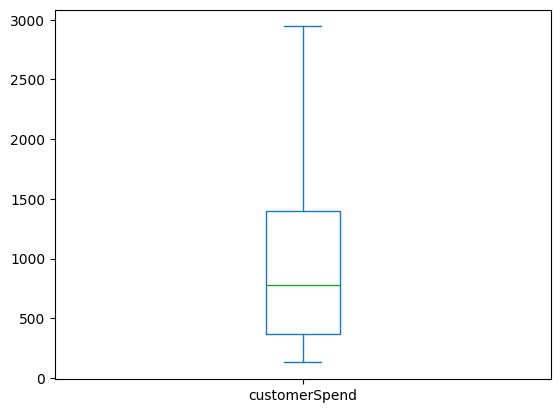

In [35]:
##HINT: It may be helpful to understand the data's distribution using a boxplot
company_data_df["customerSpend"].plot(kind="box", showfliers=False) # The showfliers argument removes outliers

In [36]:
# To make this more readable, we can add labels using the labels argument
customerSpend_bins = pd.qcut(..., q=...)

## 8) Count
Unveiling the Composition: Normalizing Value Counts

The .value_counts() method in pandas is a powerful tool for understanding the frequency of unique values within a Series or column in your DataFrame. By default, it provides the raw counts of each unique value.

However, if you're interested in the proportional makeup of the data, you can leverage the normalize=True argument. This argument instructs .value_counts() to calculate the percentage that each unique value represents within the entire dataset.

In [37]:
# Apply the value_counts function to the firmSize column
company_data_df[
    "firmSize"
] ...

1.0      4444
2.0       431
3.0       184
4.0        90
5.0        60
6.0        33
7.0        25
8.0        22
11.0       11
10.0        8
9.0         7
12.0        6
14.0        5
13.0        5
16.0        5
20.0        4
18.0        2
89.0        1
33.0        1
38.0        1
29.0        1
95.0        1
23.0        1
15.0        1
47.0        1
17.0        1
35.0        1
45.0        1
197.0       1
Name: firmSize, dtype: int64

## 9) Check
Many machine learning algorithms struggle to handle missing data. Let's explore some helpful functions to identify and manage null values in your data.

In [3]:
# to express as a percentage, divide the number of null values by the total number of values in the column and multiply by 100
company_data_df["clientBase"].isna().sum()

In [ ]:
# ...your percentage calculation here...

## 9) Putting it all together
Let's combine our cleaned data!

In [40]:
# Drop the 'productType', 'customerSpend' & 'clientBase' columns
company_data_df.drop(
    ["productType", "customerSpend", "clientBase"], axis=1, inplace=True
)

In [43]:
# Replace 'productType' with the binarized dataframe & 'customerSpend' with customerSpend_bins
pd.concat(
    [
        company_data_df.reset_index(drop=True),
        customerSpend_bins.reset_index(drop=True),
        product_type_dataframe.reset_index(drop=True),
    ],
    axis=1,
).drop_duplicates()

,accountID,companyID,label,saleMonth,firmSize,customerSpend,Efile,Enterprise,Evaluation,Federal,First State,Portal,Pre-paid E-file,Prior Year,UnlimitedEfile,Upgrade,All States,Efile,Evaluation,Federal
0,44451402,84097.0,churned,4,1.0,"(1661.4, 2687.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,30492817,90491.0,churned,4,1.0,"(128.999, 258.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16691344,99904.0,churned,4,1.0,"(258.0, 328.0]",0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,19433773,90064.0,churned,4,1.0,"(778.0, 1098.0]",0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,25169734,1144.0,churned,4,1.0,"(128.999, 258.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349,81970529,20955.0,non_churned,5,1.0,"(128.999, 258.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
5350,4895379,5830.0,non_churned,6,1.0,"(128.999, 258.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
5351,52265030,3546.0,non_churned,5,1.0,"(128.999, 258.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1
5352,5851527,70503.0,non_churned,5,4.0,"(128.999, 258.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1


# We're Ready to Unleash the Machine! Your Homework:)

Fantastic work! Through careful exploration and preparation, we've successfully combined and cleaned our data. This cleaned and processed dataset serves as the foundation for building a robust machine Learning model. For your homework, let's define the machine learning problem we aim to solve.

### Task 1: Define Your Machine Learning Problem

 - Clearly articulate the specific problem you're trying to solve with machine learning. What business question are you hoping to answer, or what predictions do you want to make?
 - Identify the target variable. This is the variable you want your model to predict. Is it a categorical variable (e.g., churned vs. not churned) or a continuous variable (e.g., customer lifetime value)?

### Task 2: Research Potential Machine Learning Algorithms

 - Based on your target variable type (categorical or continuous) and the overall objective of your problem, research different machine learning algorithms that might be suitable candidates.
 - Briefly describe at least two potential algorithms you've found. For each algorithm, include a brief explanation of how it works (high-level overview).

### Task 3: Prepare for Model Training

 - Review the steps involved in training a machine learning model: splitting data into training and testing sets, training the model, and evaluating its performance.
 - Briefly explain the purpose of splitting data into training and testing sets.

Deliverables:

    A short written document (1-2 pages) addressing the tasks above.
    Briefly answer the following questions in your document:
        What is the specific machine learning problem you're trying to solve?
        What is your target variable?
        Briefly describe two potential algorithms you've identified and why they might be suitable.

Tips:

Consider the trade-offs between different algorithms. There's no "one-size-fits-all" solution, so understanding the strengths and weaknesses of each approach is crucial.

For extra credit, build your machine learning model and upload your model code to a GitHub repo to share with the group!